## Ejercicio 6

### Tareas:

1. **Ruido Gaussiano**:
   - Usa la función **`randn(dst, mean, stddev)`** de OpenCV para generar valores aleatorios con una media (`mean`) y desviación estándar (`stddev`) específicas.
   - Introduce este **ruido gaussiano** en una imagen.

2. **Ruido Sal y Pimienta**:
   - Usa la función **`randint()`** de la librería `random` para decidir si un píxel se sustituye por blanco o negro con cierta probabilidad.
   - Introduce **ruido sal y pimienta** en una imagen.



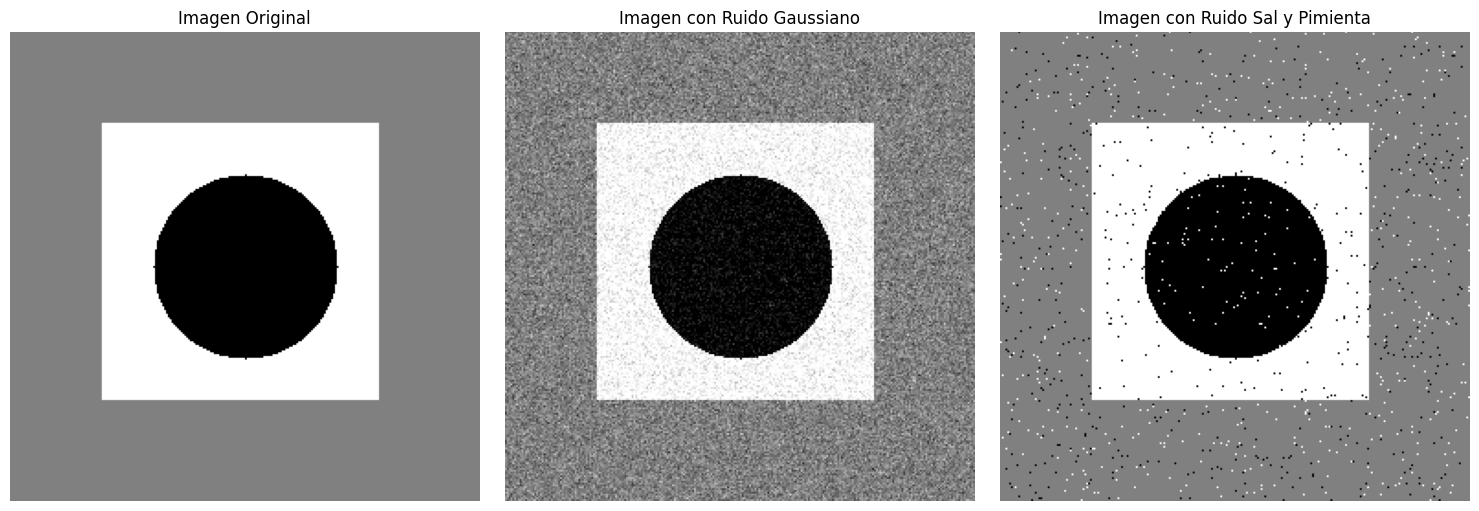

In [4]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

# Cargar la imagen original
image = cv2.imread('generated_image.png', cv2.IMREAD_GRAYSCALE)

# Parámetros para el ruido gaussiano
mean = 0         # Media del ruido
stddev = 25      # Desviación estándar del ruido

# Generar ruido gaussiano
gaussian_noise = np.zeros(image.shape, dtype=np.float32)  # Matriz de ruido
cv2.randn(gaussian_noise, mean, stddev)  # Llenar con ruido gaussiano

# Sumar el ruido a la imagen original
noisy_image_gaussian = np.clip(image + gaussian_noise, 0, 255).astype(np.uint8)

# Parámetros para el ruido sal y pimienta
saturation = 0.02  # Porcentaje de píxeles que recibirán ruido (0 a 1)

# Copiar la imagen original
sal_pimienta_image = image.copy()

# Añadir ruido sal y pimienta
for i in range(sal_pimienta_image.shape[0]):
    for j in range(sal_pimienta_image.shape[1]):
        if random.random() < saturation:  # Decide si un píxel será cambiado
            # Elijo aleatoriamente entre sal (255) o pimienta (0)
            sal_pimienta_image[i, j] = 255 if random.random() < 0.5 else 0

# Visualizar la imagen original y las imágenes con ruido
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Mostrar la imagen original
axes[0].imshow(image, cmap='gray')
axes[0].set_title("Imagen Original")
axes[0].axis('off')

# Mostrar la imagen con ruido gaussiano
axes[1].imshow(noisy_image_gaussian, cmap='gray')
axes[1].set_title("Imagen con Ruido Gaussiano")
axes[1].axis('off')

# Mostrar la imagen con ruido sal y pimienta
axes[2].imshow(sal_pimienta_image, cmap='gray')
axes[2].set_title("Imagen con Ruido Sal y Pimienta")
axes[2].axis('off')

plt.tight_layout()
plt.show()

## Ejercicio: Image Filtering en OpenCV

### Descripción:
Con la función **`filter2D()`** de OpenCV puedes crear tu propio filtro para aplicar a una imagen. Esta función te permite realizar cualquier tipo de operación de filtrado en la imagen utilizando un **kernel** personalizado.

### Tareas:
1. Usa **`filter2D()`** para crear un filtro personalizado y aplicarlo a una imagen.
2. Experimenta con filtros sencillos como:
   - Desenfoque (media, gaussiano, etc.)
   - Detección de bordes (Sobel, Laplaciano, etc.)
   - Realce de bordes (filtro de paso alto).
3. Visualiza el efecto de los filtros aplicados en la imagen.
4. Explora cómo diferentes valores de kernels afectan la imagen.

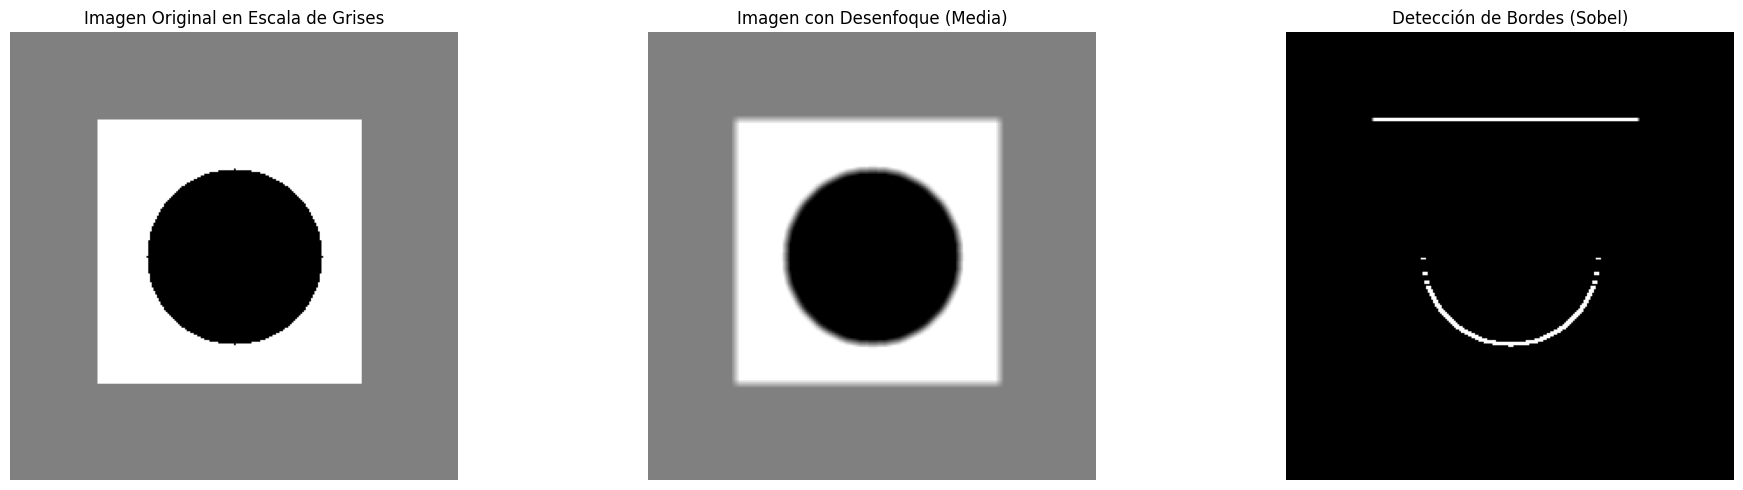

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar una imagen a color
image = cv2.imread('generated_image.png')

# Convertir la imagen a escala de grises para simplificar
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Filtro de desenfoque (media)
kernel_blur = np.ones((5, 5), np.float32) / 25  # Filtro de media 5x5
blurred_image = cv2.filter2D(gray_image, -1, kernel_blur)

# Filtro de detección de bordes (Sobel)
kernel_sobel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float32)  # Filtro Sobel
sobel_image = cv2.filter2D(gray_image, -1, kernel_sobel)

# Mostrar las imágenes originales y los resultados
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

axes[0].imshow(gray_image, cmap='gray')
axes[0].set_title("Imagen Original en Escala de Grises")
axes[0].axis('off')

axes[1].imshow(blurred_image, cmap='gray')
axes[1].set_title("Imagen con Desenfoque (Media)")
axes[1].axis('off')

axes[2].imshow(sobel_image, cmap='gray')
axes[2].set_title("Detección de Bordes (Sobel)")
axes[2].axis('off')

plt.tight_layout()
plt.show()

## OpenCV - Argumento `BorderType` en Filtros

OpenCV proporciona varias opciones para el argumento **`BorderType`** en las funciones de procesamiento de imágenes, como `filter2D()`. El argumento **`BorderType`** especifica cómo se deben tratar los bordes de una imagen al aplicar un filtro o realizar operaciones de convolución.

### Opciones de `BorderType`:
1. **`cv2.BORDER_CONSTANT`**: Los valores fuera de los límites se rellenan con un valor constante (que puede ser especificado por el usuario).
2. **`cv2.BORDER_REPLICATE`**: Se repite el borde más cercano para los píxeles fuera de los límites.
3. **`cv2.BORDER_REFLECT`**: Los píxeles fuera de los límites se reflejan, creando un efecto de simetría.
4. **`cv2.BORDER_REFLECT_101`**: Similar a `BORDER_REFLECT`, pero el valor de los píxeles reflejados se coloca en los bordes de manera diferente.
5. **`cv2.BORDER_WRAP`**: Los píxeles fuera de los límites se envuelven, utilizando los píxeles del lado opuesto de la imagen.
6. **`cv2.BORDER_TRANSPARENT`**: Utiliza una transparencia, comúnmente usada en imágenes con canal alfa.


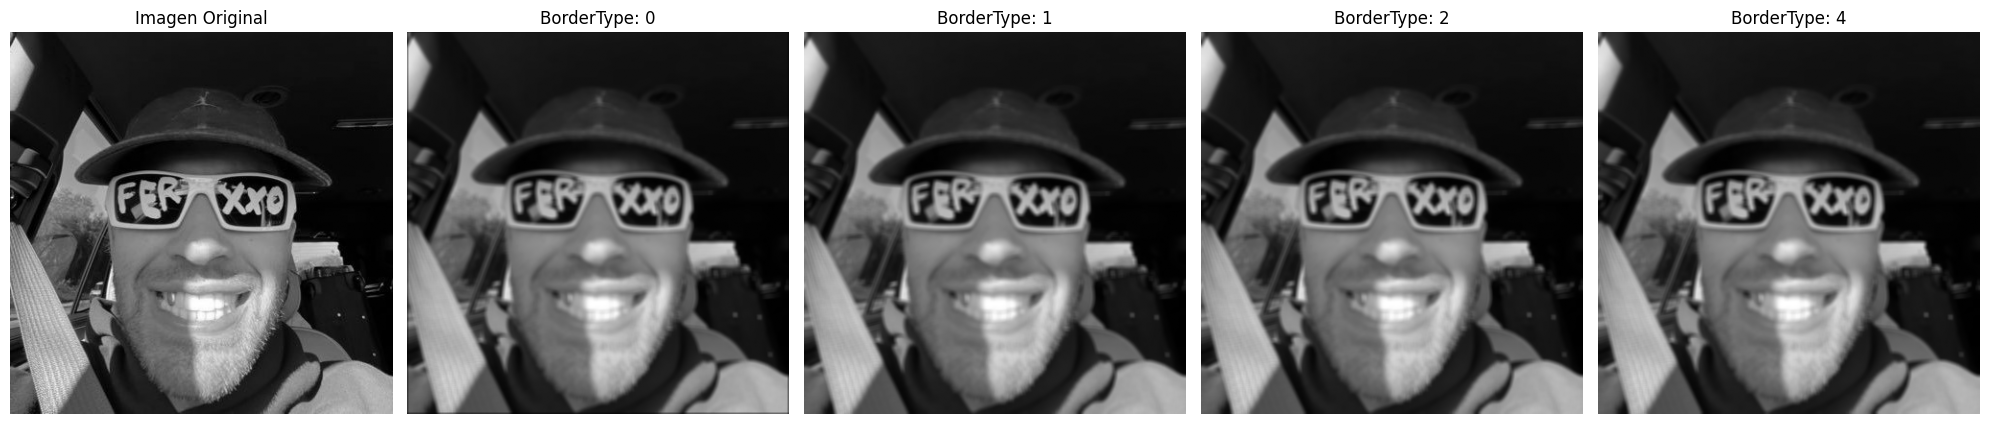

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen a color
image = cv2.imread('ferxxo.jpg')

# Convertir la imagen a escala de grises para simplificar
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Definir un filtro sencillo (filtro de media)
kernel = np.ones((5, 5), np.float32) / 25  # Filtro de media 5x5

# Aplicar el filtro con diferentes BorderTypes
border_types = [
    cv2.BORDER_CONSTANT,
    cv2.BORDER_REPLICATE,
    cv2.BORDER_REFLECT,
    cv2.BORDER_REFLECT_101
]

# Preparar el espacio para mostrar las imágenes (ajustar el número de subgráficas)
fig, axes = plt.subplots(1, 5, figsize=(20, 10))  # Usamos 1 fila y 5 columnas

# Aplicar y mostrar la imagen original
axes[0].imshow(gray_image, cmap='gray')
axes[0].set_title("Imagen Original")
axes[0].axis('off')

# Aplicar el filtro con cada BorderType y mostrar los resultados
for i, border_type in enumerate(border_types):
    filtered_image = cv2.filter2D(gray_image, -1, kernel, borderType=border_type)
    
    axes[i + 1].imshow(filtered_image, cmap='gray')
    axes[i + 1].set_title(f"BorderType: {border_type}")
    axes[i + 1].axis('off')

plt.tight_layout()
plt.show()

## Ejercicio: Filtros de Desenfoque en OpenCV

### Descripción:
Usa las funciones **`blur()`** y **`boxFilter()`** de OpenCV para aplicar filtros de desenfoque en una imagen. Ambas funciones aplican un filtro de media, pero tienen algunas diferencias en cuanto a flexibilidad y control de los parámetros.

### Tareas:
1. **`cv2.blur()`**: Aplica un filtro de desenfoque (media) con un kernel de tamaño definido (por ejemplo, 5x5).
2. **`cv2.boxFilter()`**: Aplica el mismo filtro de desenfoque, pero permite más control sobre los parámetros, como la normalización del kernel o la profundidad de la imagen de salida.
3. Compara los resultados de ambos filtros en una imagen.
4. Experimenta con diferentes tamaños de kernel y observa cómo afecta al desenfoque.

### Recursos:
- [Documentación oficial de OpenCV sobre filtros](https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html) para más detalles sobre las funciones `blur()` y `boxFilter()`.


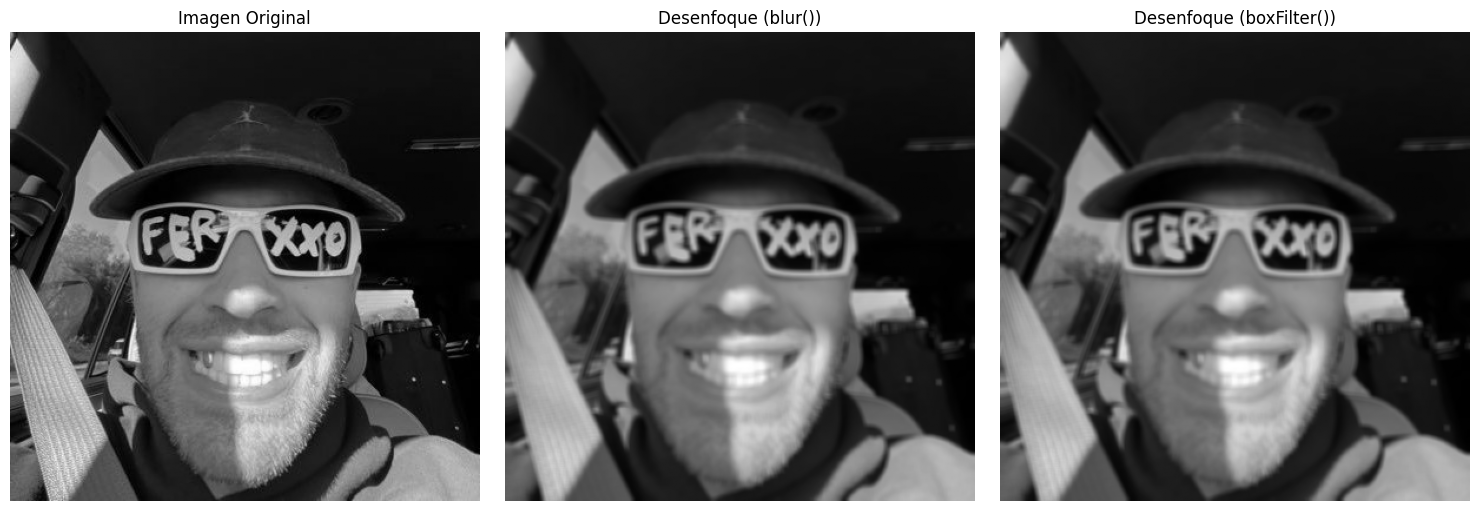

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen original
image = cv2.imread('ferxxo.jpg')

# Convertir a escala de grises para simplificar
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Aplicar el filtro de desenfoque usando cv2.blur
blurred_image = cv2.blur(gray_image, (5, 5))

# Aplicar el filtro de desenfoque usando cv2.boxFilter
box_filtered_image = cv2.boxFilter(gray_image, -1, (5, 5))

# Visualizar las imágenes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(gray_image, cmap='gray')
axes[0].set_title("Imagen Original")
axes[0].axis('off')

axes[1].imshow(blurred_image, cmap='gray')
axes[1].set_title("Desenfoque (blur())")
axes[1].axis('off')

axes[2].imshow(box_filtered_image, cmap='gray')
axes[2].set_title("Desenfoque (boxFilter())")
axes[2].axis('off')

plt.tight_layout()
plt.show()


## Ejercicio: Filtro Gaussiano en OpenCV

### Descripción:
Usa la función **`GaussianBlur()`** de OpenCV para aplicar un filtro gaussiano a una imagen. El filtro gaussiano es ampliamente utilizado para suavizar una imagen, reducir el ruido y los detalles finos, y es especialmente útil en tareas de preprocesamiento de imágenes.

### Tareas:
1. **`cv2.GaussianBlur()`**: Aplica un filtro gaussiano a la imagen con un tamaño de kernel específico. 
2. Experimenta con diferentes tamaños de kernel y observa cómo afecta al suavizado de la imagen.
3. Compara el resultado del filtro gaussiano con el filtro de media utilizando **`cv2.blur()`** o **`cv2.boxFilter()`**.
4. Observa cómo el filtro gaussiano preserva mejo


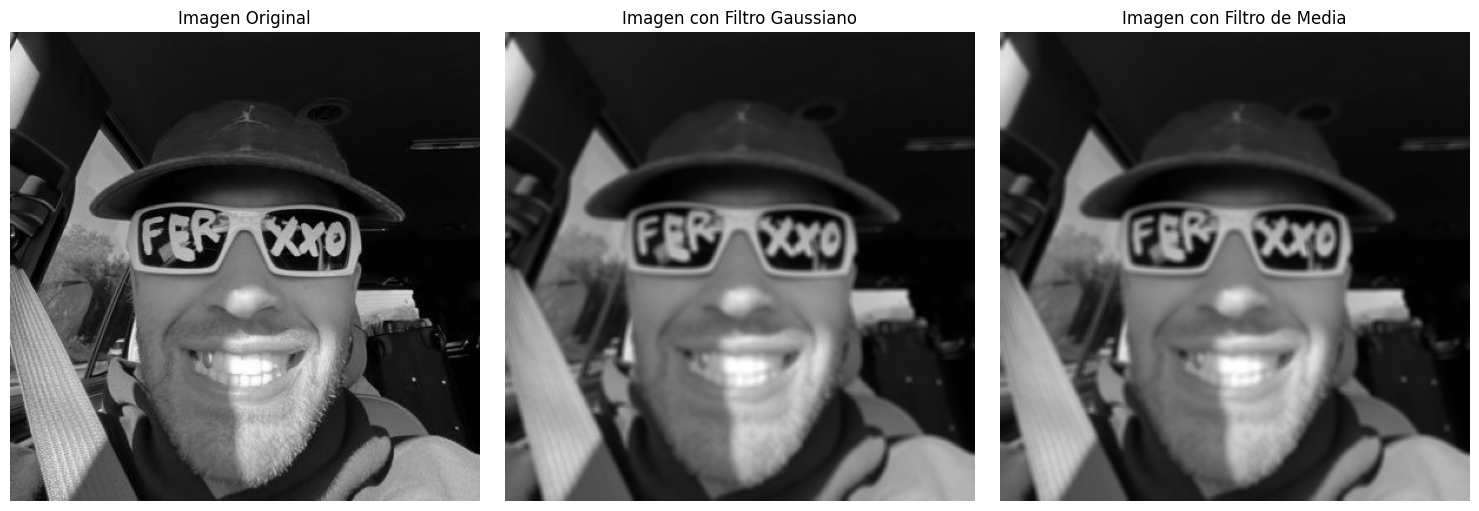

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen original
image = cv2.imread('ferxxo.jpg')

# Convertir la imagen a escala de grises para simplificar
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Filtro Gaussiano
kernel_size = (5, 5)  # Tamaño del kernel 5x5
sigma = 25            # Desviación estándar del filtro gaussiano

# Aplicar el filtro gaussiano
gaussian_blurred_image = cv2.GaussianBlur(gray_image, kernel_size, sigma)

# Filtro de media con blur()
blurred_image = cv2.blur(gray_image, (5, 5))

# Visualizar las imágenes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Imagen original
axes[0].imshow(gray_image, cmap='gray')
axes[0].set_title("Imagen Original")
axes[0].axis('off')

# Imagen con filtro Gaussiano
axes[1].imshow(gaussian_blurred_image, cmap='gray')
axes[1].set_title("Imagen con Filtro Gaussiano")
axes[1].axis('off')

# Imagen con filtro de media
axes[2].imshow(blurred_image, cmap='gray')
axes[2].set_title("Imagen con Filtro de Media")
axes[2].axis('off')

plt.tight_layout()
plt.show()

## Ejercicio: Aplicación del Filtro Laplaciano en OpenCV

### Descripción:
Usa la función **`cv2.Laplacian()`** de OpenCV para aplicar el operador Laplaciano a una imagen. Este operador es útil para la detección de bordes, ya que calcula la segunda derivada de la imagen y resalta los cambios rápidos de intensidad (bordes).

### Tareas:
1. Aplica el operador **Laplaciano** a una imagen utilizando **`cv2.Laplacian()`** con un kernel de tamaño 3x3.
2. Estudia los **argumentos** de la función:
   - **`ddepth`**: Profundidad de la imagen de salida.
   - **`ksize`**: Tamaño del kernel (típicamente 3x3).
   - **`scale`**: Factor de escala.
   - **`delta`**: Valor que se suma al resultado.
   - **`borderType`**: Tipo de borde utilizado en la operación.
3. Observa qué **máscara** se utiliza en la operación Laplaciana y cómo afecta a los bordes de la imagen.
4. ¿El resultado del Laplaciano proporciona una imagen con valores dentro del rango [0, 255]? Si no es así, ¿cómo se puede reescalar el resultado?

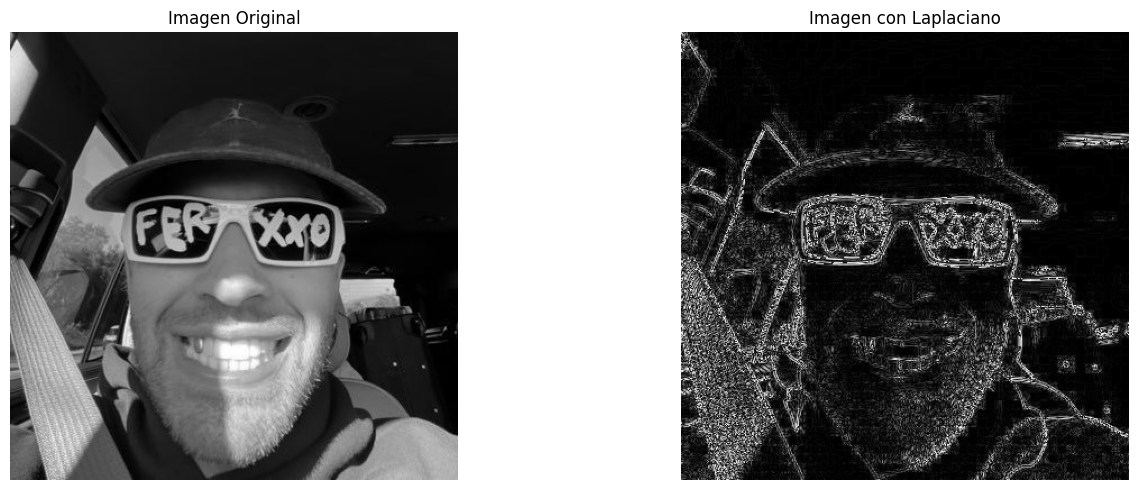

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen
image = cv2.imread('ferxxo.jpg', cv2.IMREAD_GRAYSCALE)

# Aplicar el Laplaciano
laplacian_image = cv2.Laplacian(image, cv2.CV_64F, ksize=3)

# Convertir la imagen de salida a tipo de dato uint8 para visualización
laplacian_image = np.uint8(np.absolute(laplacian_image))

# Mostrar la imagen original y la imagen con Laplaciano
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].imshow(image, cmap='gray')
axes[0].set_title("Imagen Original")
axes[0].axis('off')

axes[1].imshow(laplacian_image, cmap='gray')
axes[1].set_title("Imagen con Laplaciano")
axes[1].axis('off')

plt.tight_layout()
plt.show()


# Ejercicios

## Ejercicio 1

Queremos cargar una imagen a color cualquiera (png), transformarla a escala de grises e introducirle ruido sal y pimienta, por ejemplo, usando este código:

```python
import random

def ruido(image, a, b):  # a y b son las probabilidades de ocurrir el ruido pimienta y sal, respectivamente.
    aleat = np.random.randint(1, 101, size=(image.shape[0], image.shape[1]))
    image2 = np.where(aleat <= 100 * a, 0, image)
    out = np.where(aleat > 100 - 100 * b, 255, image2)
    return out
```
### Tareas:

**a)** ¿Qué cantidad aproximada de píxeles de la imagen original se ven modificados por el ruido introducido? Razónalo.

**b)** Razona qué filtro de los vistos en clase es más apropiado para eliminar el ruido introducido.

**c)** Después, aplícalo para ver qué efectivamente es así, comparándolo con otro filtro distinto de suavizado. Prueba también distintos tamaños de máscaras para ver cuál funciona mejor.

**d)** Usa la medida del error denominada **Mean Squared Error (error cuadrático medio)** para razonar cuál es el óptimo de los probados anteriormente. ¿Coincide con el que habías escogido como óptimo?


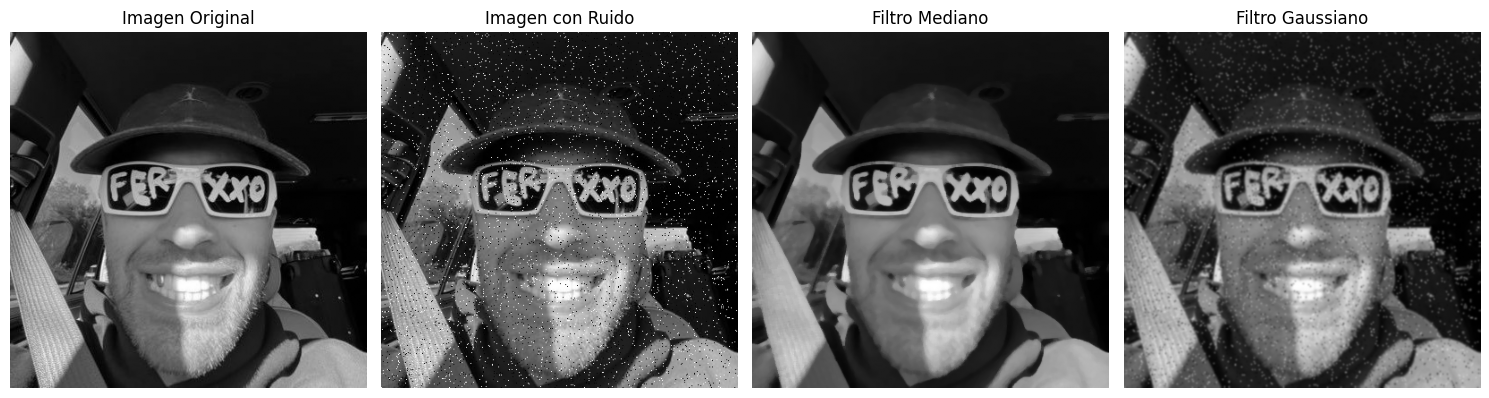

MSE entre imagen original y filtro mediano: 19.407579098121243
MSE entre imagen original y filtro gaussiano: 40.38130413753682


In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Función para introducir ruido sal y pimienta
def ruido(image, a, b):  # a y b son las probabilidades de ocurrir el ruido pimienta y sal, respectivamente.
    aleat = np.random.randint(1, 101, size=(image.shape[0], image.shape[1]))
    image2 = np.where(aleat <= 100 * a, 0, image)  # Ruido pimienta
    out = np.where(aleat > 100 - 100 * b, 255, image2)  # Ruido sal
    return out

# Cargar la imagen original
image = cv2.imread('ferxxo.jpg')  # Reemplaza 'path_to_image.png' con la ruta de tu imagen
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convertir a escala de grises

# Introducir ruido sal y pimienta
noisy_image = ruido(gray_image, 0.02, 0.02)  # 2% de ruido sal y pimienta

# Aplicar filtro mediano
median_filtered = cv2.medianBlur(noisy_image, 5)  # Tamaño de la máscara: 5x5

# Aplicar filtro gaussiano
gaussian_filtered = cv2.GaussianBlur(noisy_image, (5, 5), 1)

# Mostrar imágenes
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

axes[0].imshow(gray_image, cmap='gray')
axes[0].set_title("Imagen Original")
axes[0].axis('off')

axes[1].imshow(noisy_image, cmap='gray')
axes[1].set_title("Imagen con Ruido")
axes[1].axis('off')

axes[2].imshow(median_filtered, cmap='gray')
axes[2].set_title("Filtro Mediano")
axes[2].axis('off')

axes[3].imshow(gaussian_filtered, cmap='gray')
axes[3].set_title("Filtro Gaussiano")
axes[3].axis('off')

plt.tight_layout()
plt.show()

# Función para calcular el error cuadrático medio (MSE)
def mse(image1, image2):
    return np.mean((image1 - image2) ** 2)

# Calcular MSE entre la imagen original y las imágenes filtradas
mse_median = mse(gray_image, median_filtered)
mse_gaussian = mse(gray_image, gaussian_filtered)

print(f'MSE entre imagen original y filtro mediano: {mse_median}')
print(f'MSE entre imagen original y filtro gaussiano: {mse_gaussian}')


## Ejercicio 2

### Descripción:
Cargar una imagen en escala de grises de 8 bits y realizar varias operaciones de filtrado y realce de detalles.

### Tareas:

**a)** Busca la forma de aplicar un filtro creado por ti mismo a la imagen y averigua cuáles son las opciones con las que cuentas para el tratamiento del marco exterior de píxeles de la imagen. ¿Hay una opción por defecto? Haz pruebas.

**b)** Queremos realzar los detalles de la imagen usando el filtro Laplaciano. Averigua, consultando la documentación correspondiente, qué máscara está implementada y cómo está procesando la salida la implementación usada del Laplaciano, es decir: ¿los valores de salida están ajustados a [0,255]? ¿O en qué rango están? ¿Qué ocurre con los valores negativos del Laplaciano? Según cómo sean estos valores de salida, razona cómo puedes usar ese Laplaciano para realzar los detalles claros de la imagen y hazlo, mostrando y evaluando los resultados tras haber probado con distintos tamaños de máscaras.

**Nota**: Si no "controlas" bien qué hace la implementación del Laplaciano, implementa tú mismo/a el filtro.


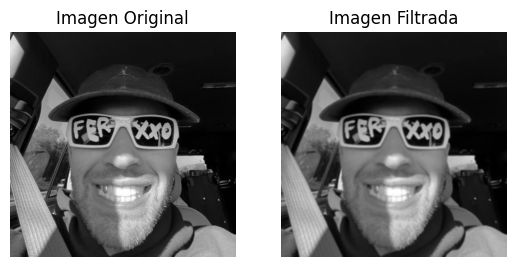

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen en escala de grises
image = cv2.imread('ferxxo.jpg', cv2.IMREAD_GRAYSCALE)

# Crear un filtro personalizado (por ejemplo, un filtro de media 3x3)
kernel = np.ones((3, 3), np.float32) / 9

# Aplicar el filtro a la imagen
filtered_image = cv2.filter2D(image, -1, kernel, borderType=cv2.BORDER_REFLECT_101)

# Mostrar imagen original y filtrada
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Imagen Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title("Imagen Filtrada")
plt.axis('off')

plt.show()

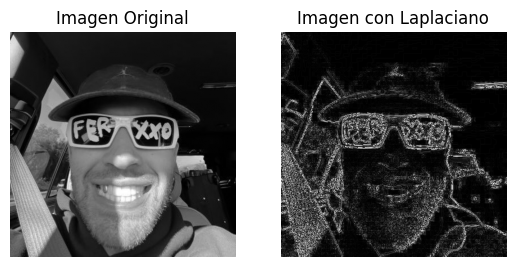

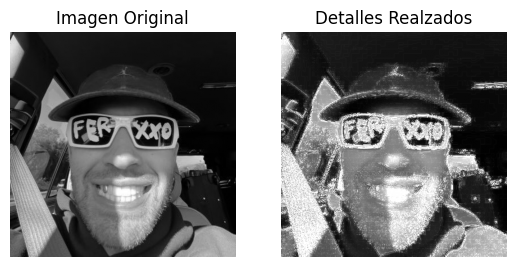

In [28]:
# Aplicar el filtro Laplaciano
laplacian_image = cv2.Laplacian(image, cv2.CV_64F, ksize=3)

# Tomar el valor absoluto y ajustar a [0, 255]
laplacian_image = np.uint8(np.absolute(laplacian_image))

# Mostrar imagen original y resultado del Laplaciano
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Imagen Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(laplacian_image, cmap='gray')
plt.title("Imagen con Laplaciano")
plt.axis('off')

plt.show()

# Realzar los detalles al sumar el Laplaciano a la imagen original
enhanced_image = cv2.add(image, laplacian_image)

# Mostrar imagen original y la imagen con detalles realzados
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Imagen Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(enhanced_image, cmap='gray')
plt.title("Detalles Realzados")
plt.axis('off')

plt.show()
